# Averaging TPM counts per cell line across the RNAseq panels

Generate .csv files (TPM-A; TPM-B and TPM-C) from downloaded datasets A (E-MTAB-2706), B (E-MTAB-2770) and C (E-MTAB-3983) by keeping only the cell lines used in the binding datasets. Column names are set as cell line names and the RNAseq dataset corresponding letter (i.e. A2058 A in TPM-A.csv, A2058 B in TPM-B.csv).

Import the tables to merge into a panda objects

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#read in the files
filenames = ['TPM-A.csv','TPM-B.csv','TPM-C.csv']
dataframes = [ pd.read_csv(f) for f in filenames]
dataframes = [x.set_index('Gene ID') for x in dataframes]


#Gene ID	Gene Name
#dataframes[2]

In [2]:
#First merge the two dataframes
merged = dataframes[0].drop('Gene Name', axis=1).join(dataframes[1].drop('Gene Name', axis=1), how="outer", on='Gene ID')

#Then add the remaining ones
for d in dataframes[2:]:
    #merged = merged.set_index(['Gene ID', 'Gene Name'])
    merged = merged.join(d.drop('Gene Name', axis=1), how="outer", on='Gene ID')


merged = merged.fillna(0)
merged.insert(0, 'Gene Name', "")
#merged

In [3]:
# Reconstruct gene name
for index, row in dataframes[0].iterrows():
    cell = merged.loc[[index],['Gene Name']].values[0][0]
    if cell == "" or cell.startswith('ENS'):
        merged.loc[[index],['Gene Name']] = row['Gene Name']


In [4]:
data = merged
data

,Gene Name,PANC-1 A,MDA-MB-468 A,CAL51 A,A-375 A,SUM 149PT A,LS 180 A,HCC1954 A,SK-BR-3 A,IGROV-1 A,...,Hep 3B2.1-7 B,HuH-7 B,MIA Paca-2 B,C-33-A C,A427 C,SW403 C,JEG-3 C,LS-180 C,HeLa C,HT-29 C
Gene ID,,,,,,,,,,,,,,,,,,,,,
ENSG00000168003,SLC3A2,158.0,194.0,287.0,226.0,248.0,243.0,313.0,478.0,174.0,...,133.0,175.0,60.0,98.0,159.0,66.0,319.0,233.0,379.0,167.0
ENSG00000000003,TSPAN6,7.0,76.0,55.0,29.0,18.0,37.0,86.0,37.0,54.0,...,56.0,58.0,0.1,24.0,33.0,42.0,33.0,49.0,24.0,27.0
ENSG00000000005,TNMD,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000000419,DPM1,135.0,200.0,125.0,392.0,200.0,139.0,200.0,248.0,200.0,...,146.0,163.0,215.0,239.0,170.0,173.0,137.0,160.0,97.0,234.0
ENSG00000000457,SCYL3,5.0,11.0,7.0,11.0,3.0,7.0,9.0,11.0,7.0,...,10.0,6.0,6.0,5.0,8.0,8.0,10.0,10.0,6.0,17.0
ENSG00000000460,C1orf112,14.0,27.0,13.0,30.0,14.0,15.0,32.0,23.0,9.0,...,15.0,10.0,13.0,12.0,9.0,12.0,18.0,14.0,14.0,6.0
ENSG00000000938,FGR,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.0,...,0.0,0.0,0.0,0.0,0.1,0.5,0.0,0.0,0.0,0.1
ENSG00000000971,CFH,0.0,0.2,2.0,0.9,1.0,0.0,9.0,0.1,0.1,...,1.0,244.0,0.2,0.6,0.0,0.0,0.0,0.0,107.0,16.0
ENSG00000001036,FUCA2,139.0,97.0,154.0,59.0,100.0,164.0,138.0,96.0,204.0,...,241.0,204.0,168.0,8.0,66.0,133.0,85.0,145.0,185.0,95.0


In [5]:
data.to_csv('TPM-compil.csv')

Editing is done in Excel to average values for a same cell line across the panels and saved as 'TPM-AVG.csv'. WiDr and HT-29 are considered to be the same cell line (cf. Cellosaurus)
Letters corresponding to the RNAseq panels are removed.

In [6]:
data = pd.read_csv('TPM-AVG.csv', index_col=0)
data

,Gene Name,A2058,A-375,A-427,A-498,AN3 CA,BT-20,C-33 A,CAL51,Calu-3,...,PLC/PRF/5,SK-BR-3,SK-CO-1,SK-HEP-1,SK-LU-1,SK-MEL-5,SK-UT-1,SUM 149PT,SW403,WM983B
Gene ID,,,,,,,,,,,,,,,,,,,,,
ENSG00000168003,SLC3A2,480.0,239.00,138.00,420.50,169.00,132.50,150.50,234.00,199.50,...,199.00,397.50,153.0,142.0,68.0,299.00,128.0,248.0,88.666667,358.0
ENSG00000000003,TSPAN6,21.0,26.00,29.00,24.00,88.50,21.50,31.00,82.00,90.50,...,23.00,23.50,102.5,26.0,8.0,37.00,21.0,18.0,30.666667,13.0
ENSG00000000005,TNMD,0.0,0.00,0.00,0.00,0.00,0.00,0.10,0.05,0.00,...,0.00,0.00,0.0,0.0,0.0,0.05,0.0,0.0,0.000000,0.0
ENSG00000000419,DPM1,193.0,415.00,159.50,181.50,76.00,243.50,250.50,136.50,187.00,...,183.50,263.50,125.0,125.0,41.0,151.00,173.0,200.0,199.333333,371.0
ENSG00000000457,SCYL3,9.0,11.00,7.50,5.50,5.00,8.50,5.00,11.00,8.00,...,5.00,12.00,12.0,3.0,2.0,4.00,6.0,3.0,8.000000,8.0
ENSG00000000460,C1orf112,22.0,29.00,9.50,12.00,13.00,19.50,11.00,14.00,17.50,...,12.50,18.50,17.0,7.0,5.0,8.50,8.0,14.0,10.333333,14.0
ENSG00000000938,FGR,0.0,0.00,0.05,0.00,0.00,0.00,0.00,0.05,0.05,...,0.00,0.05,0.0,0.0,0.0,0.10,0.1,0.0,0.966667,0.0
ENSG00000000971,CFH,8.0,0.85,0.05,47.50,2.00,0.05,0.40,5.00,6.00,...,8.50,0.05,0.0,1.0,1.0,0.35,0.1,1.0,0.066667,0.1
ENSG00000001036,FUCA2,221.0,59.00,86.00,124.00,156.50,77.00,10.50,155.00,71.00,...,319.00,85.50,172.0,88.0,36.0,90.00,96.0,100.0,136.666667,114.0


In [7]:
#list of the column you want integrated for cleaning the data, use columns_names for all
#used_columns = column_names
columns_used_in_filter = ['A2058', 'A-375', 'A-427', 'A-498', 'AN3 CA', 'BT-20', 'C-33 A', 'CAL51', 'Calu-3', 'Caov-3', 'Capan-1', 'HCC1954', 'HeLa', 'Hep 3B2.1-7', 'Hep G2', 'HT-29 WiDr', 'JEG-3', 'LS 180', 'MDA-MB-231', 'MDA-MB-468', 'PANC-1', 'PA-TU-8988T', 'PLC/PRF/5', 'SK-BR-3', 'SK-CO-1', 'SK-HEP-1', 'SK-LU-1', 'SK-MEL-5', 'SK-UT-1', 'SUM 149PT', 'SW403', 'WM983B'] # alternative, provide a list of columns [ 'LS 180', 'AN3 CA']


## Data Cleanup

We aim at removing low expression genes which are likely not to be related to our target. For this, we compute the row-wise sums of all columns and plot their distribution.

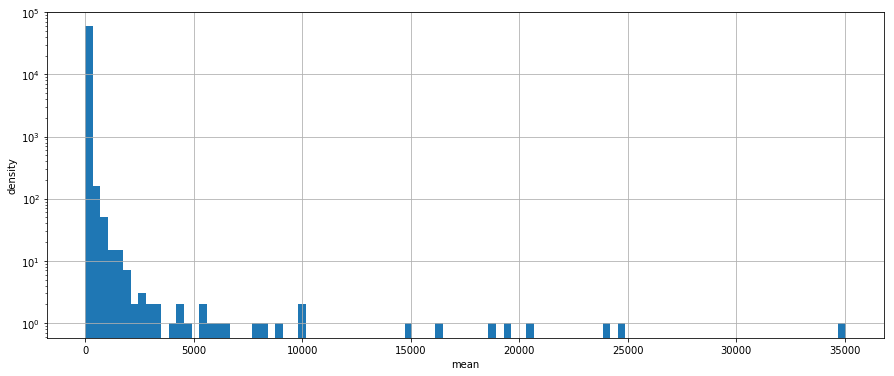

In [8]:
plt.figure(figsize=(15, 6))

hist = data[columns_used_in_filter].mean(axis=1).hist(bins=100)
plt.yscale('log')
plt.xlabel('mean')
plt.ylabel('density')
plt.plot()

plt.savefig("Gene-meandistrib-SF25-panel.png", dpi=300)
plt.show()

Focussing on the lower sum data only (between 0 and 200) reveals the following distribution:

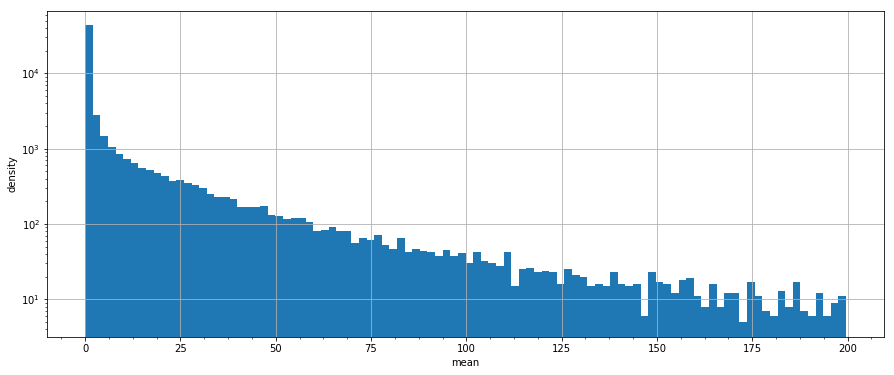

In [9]:
plt.figure(figsize=(15, 6))

data[columns_used_in_filter].mean(axis=1)[data[columns_used_in_filter].mean(axis=1) < 200].hist(bins=100)

plt.minorticks_on()
plt.yscale('log')
plt.xlabel('mean')
plt.ylabel('density')
plt.plot()

plt.savefig("Gene-meandistrib-SF25-panel-fine.png", dpi=300)
plt.show()

The distribution suggests a reasonable cutoff of 125 TPM to denoise the data. 

In [10]:
mask = data[columns_used_in_filter].mean(axis=1) > 125
data = data[mask]
data.shape

(1107, 36)

In [11]:
data

,Gene Name,A2058,A-375,A-427,A-498,AN3 CA,BT-20,C-33 A,CAL51,Calu-3,...,PLC/PRF/5,SK-BR-3,SK-CO-1,SK-HEP-1,SK-LU-1,SK-MEL-5,SK-UT-1,SUM 149PT,SW403,WM983B
Gene ID,,,,,,,,,,,,,,,,,,,,,
ENSG00000168003,SLC3A2,480.0,239.0,138.00,420.50,169.0,132.50,150.5,234.0,199.5,...,199.0,397.5,153.0,142.0,68.0,299.00,128.0,248.0,88.666667,358.0
ENSG00000000419,DPM1,193.0,415.0,159.50,181.50,76.0,243.50,250.5,136.5,187.0,...,183.5,263.5,125.0,125.0,41.0,151.00,173.0,200.0,199.333333,371.0
ENSG00000001036,FUCA2,221.0,59.0,86.00,124.00,156.5,77.00,10.5,155.0,71.0,...,319.0,85.5,172.0,88.0,36.0,90.00,96.0,100.0,136.666667,114.0
ENSG00000002586,CD99,173.0,35.5,87.00,118.00,331.0,70.50,94.0,267.0,54.0,...,263.0,94.0,47.0,140.0,20.0,144.50,184.0,55.0,167.000000,141.0
ENSG00000002834,LASP1,170.0,155.0,161.00,292.50,132.5,354.00,76.0,235.5,442.0,...,159.0,162.5,109.5,320.0,99.0,42.00,261.0,184.0,154.000000,118.0
ENSG00000004059,ARF5,166.0,178.5,200.50,235.50,399.0,254.00,303.0,193.5,97.5,...,187.5,440.0,308.0,195.0,30.0,143.00,195.0,271.0,134.666667,78.0
ENSG00000004142,POLDIP2,220.0,332.0,147.00,297.50,244.5,282.50,291.5,236.5,115.5,...,223.0,566.0,153.5,228.0,82.0,177.50,192.0,268.0,153.333333,139.0
ENSG00000004478,FKBP4,158.0,175.0,360.50,89.00,190.5,258.50,248.5,146.5,162.5,...,148.5,269.0,70.0,75.0,45.0,101.50,206.0,287.0,45.000000,67.0
ENSG00000004779,NDUFAB1,189.0,306.0,162.00,121.50,146.0,102.50,232.0,127.0,116.5,...,87.0,187.0,102.5,63.0,22.0,99.50,168.0,113.0,163.000000,136.0


In [12]:
data.to_csv('TPM-AVG125filtered.csv')